<h1 align = 'center', style = 'font-family:verdana'>DEVELOPMENT OF A MACHINE LEARNING MODEL TO ESTIMATE THE CREDIT WORTHINESS OF LOAN APPLICANTS </h1>

<h2  style = 'text-align:center';'font-family:verdana'>JOSEPH SEGBEFIA (B1011628)</h2>
<h3  style = 'text-align:center';'font-family:verdana'>GISMA Business School</h3>
<h4  style = 'text-align:center';'font-family:verdana'> MSc. Business Intelligence and Analytics</h4>

<h4  style = 'text-align:center';'color:blue';'font-family:verdana'>Predictive Analytics</h4>

<p style = 'font-family:verdana'>Problem Statement: A payday loan company used human experts to assess the credit risk of 988 credit applications. The aim is to use this input to create a system that would estimate the credit risk of new applications.

<h3 style = 'font-family:verdana'>ABSTRACT</h3>
<p style = 'font-family:verdana'>The objective of this project is to develop a machine learning model to help estimate or predict the credit worthiness of loan applicants. The estimation/prediction will be done by looking at some information (features) on each applicant. This is a case of supervised machine learning technique called classification, where the algorithm is first trained on features of each applicant, and used to classify new applicants as 'worthy' or 'not worthy' for a loan.</p>

<h3 style = 'font-family:verdana'>INTRODUCTION</h3>
<p style = 'font-family:verdana'>In recent times, most industries are on the path of digital transformation and machine learning is at the center of this revolution. Institutions like banks, loan companies, e-commerce companies and hospitals usually employ machine learning to make their work easier. Of all the industries on the path of digital transformation, financial institutions, like loan companies and banks are at the top of the list of those that can benefit the most. Loan companies for example use machine learning which helps them become more agile, and also gives them the ability to process loans faster and more accurately. 
</p>
<p style = 'color:red'>Remember to complete this section </p>

<h3 style = 'font-family:verdana'>METHODOLOGY</h3>
<p style = 'color:red'>Remember to complete this section </p>

<h4 style = 'font-family:verdana'> The Data and Exploratory Data Analysis</h4>

In [1]:
#IMPORTING LIBRARIES AND DEPENDENCIES
#Import dependencies
%matplotlib inline

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [2]:
#Loading the data into a pandas dataframe called data
data = pd.read_excel('./Datasets/data.xlsx')

print('The dataframe has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The dataframe has 988 rows and 22 columns


<h4 style = 'font-family:verdana'>The Data</h4>
<p style = 'font-family:verdana'> The dataset is made up of 988 rows. This means that it contains information on 988 loan applicants, where each row represents one applicant. In addition to the number of rows, it has twenty-two (22) columns (features). The features or columns include; 'foreignworker', 'status', 'credithistory', 'purpose', and 'savings' just to name a few. Among these features, is the target variable (the variable the machine learning model predicts) is the creditworthy column. In order for the machine learning model to predict the credit worthiness of future applicants, it must be first trained using the other features. The data types of the features in the dataset are: 'string' which is usually represnted as 'object' and 'numeric' usually represented as an 'integer (int64)' or a 'float (float64)'. The cell below shows the datatype and the non-null value counts for each column. As can be seen, the data contains no values.</p>
<p style = 'color:red'>Review this section</p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   foreignworker             988 non-null    object 
 1   status                    988 non-null    object 
 2   credithistory             988 non-null    object 
 3   purpose                   988 non-null    object 
 4   savings                   988 non-null    object 
 5   employmentsince           988 non-null    object 
 6   otherdebtors              988 non-null    object 
 7   property                  988 non-null    object 
 8   otherinstallments         988 non-null    object 
 9   housing                   988 non-null    object 
 10  job                       988 non-null    object 
 11  phone                     988 non-null    object 
 12  duration                  988 non-null    int64  
 13  creditamount              988 non-null    int64  
 14  installmen

<h4 style = 'font-family:verdana'>Exploratory Data Analysis</h4>
<p style = 'font-family:verdana'> Exploratory Data Analysis (EDA) is usually on of the first things a data scientist or data analyst does to the data. The main purpose of performing Exploratory Data Analysis is to help the data scientist have a look at the data he has before making any assumptions. It helps to identify obvious errors and also to identify and understand patterns within the data, detect outliers and also to find relationships and associations between variables. In the next few cells, exploratory data analysis will be performed on the dataset to help bring out hidden information in the data before a machine learning model can be fitted.</p>

  foreignworker    status      credithistory           purpose  \
0           yes  < 0 Euro  critical account/  radio/television   

                       savings employmentsince otherdebtors     property  \
0  unknown/ no savings account   .. >= 7 years         none  real estate   

  otherinstallments housing  ... duration creditamount  installmentrate  \
0              none     own  ...        6         1169                4   

   residencesince  age  numberofexsistingcredits  numberofliablepeople  \
0               4   67                         2                     1   

   gender  creditworthy creditamout_per_month  
0    male        Worthy            194.833333  

[1 rows x 22 columns]

The youngest applicant is 19 years
The oldest applicant is 75 years
The average age of an applicant is 35.46 years



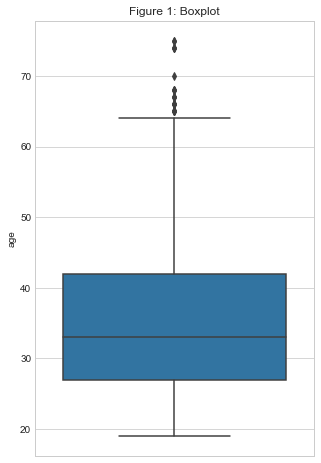

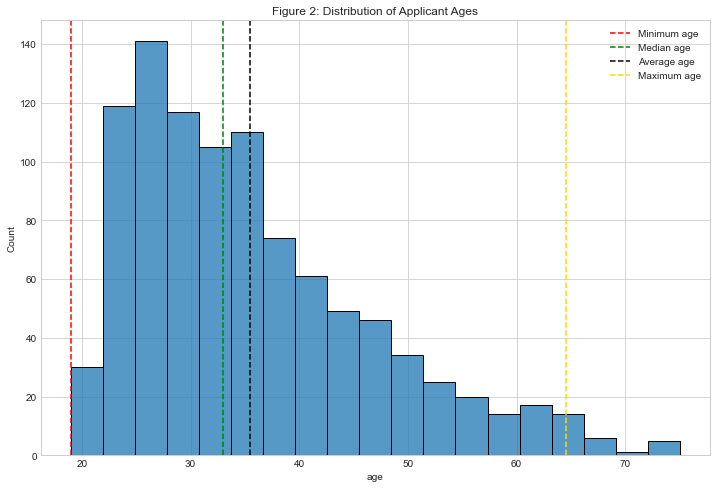

In [4]:
#Performing Exploratory Data Analysis
print(data.head(1)) #Printing the first row of the dataframe
print('')

#Extracting the ages of the loan applicants into a variable called ages
ages = data['age']
print('The youngest applicant is {} years'.format(np.min(ages)))
print('The oldest applicant is {} years'.format(np.max(ages)))
print('The average age of an applicant is {:.2f} years'.format(np.mean(ages)))
print('')

#Making a boxplot of the ages to reflect the median age, minimum age, maximum age, and any outliers present in the age
#column
plt.figure(figsize = (5, 8))
sns.boxplot(y = ages)
plt.title('Figure 1: Boxplot')
plt.show()
print('')

from scipy.stats import iqr
interquartile_range = iqr(ages)
third_quartile = np.quantile(ages, 0.75)
upper_extreme = third_quartile + (1.5 * interquartile_range)


#Making a histogram of the ages
plt.figure(figsize = (12, 8))
plt.title('Figure 2: Distribution of Applicant Ages')
sns.histplot(ages)
plt.axvline(np.min(ages), color = 'red', linestyle = 'dashed', label = 'Minimum age')
plt.axvline(np.median(ages), color = 'green', linestyle = 'dashed', label = 'Median age')
plt.axvline(np.mean(ages), color = 'black', linestyle = 'dashed', label = 'Average age')
plt.axvline(upper_extreme, color = 'gold', linestyle = 'dashed', label = 'Maximum age')
plt.legend()
plt.show()

<h5 style = 'font-family:verdana'>Applicant Ages</h5>
<p style = 'font-family:verdana'>Taking a look at the ages of the applicants in the dataset shows majority of the applicants are between 20 to 40 years as shown in the histogram (Figure 2) above. The youngest applicant is nineteen years, the oldest applicant is 75 years. The average age of the applicants is also around 35 years. This goes to show that applicants for loans as recorded in the dataset are mostly young. From the boxplot above (Figure 1), it can be observed that the there are unusually old applicants in the dataset. These applicant age group fall above the normal range of ages captured in the dataset. These age values are referred to as outliers because they differ from the normal occurrence in the dataset. From the histogram diagram above, values on the right hand side of the yellow dashed vertical line constitute the outliers. The histogram shows that the ages of the applicants are not normally distributed as majority of the ages fall to the left of the plot. This is because the mean is greater than the median causing the distribution to be skewed to the right.</p>

There are a total of 683 male applicants in the data
There are a total of 305 female applicants in the data

Proportions:
male      0.691296
female    0.308704
Name: gender, dtype: float64

Number of worthy male applicants: 493
Number of unworthy male applicants: 190

Number of worthy female applicants: 198
Number of unworthy female applicants: 107


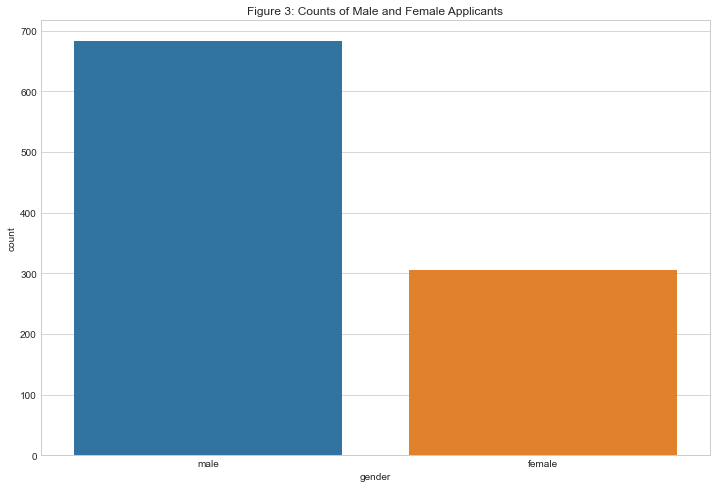

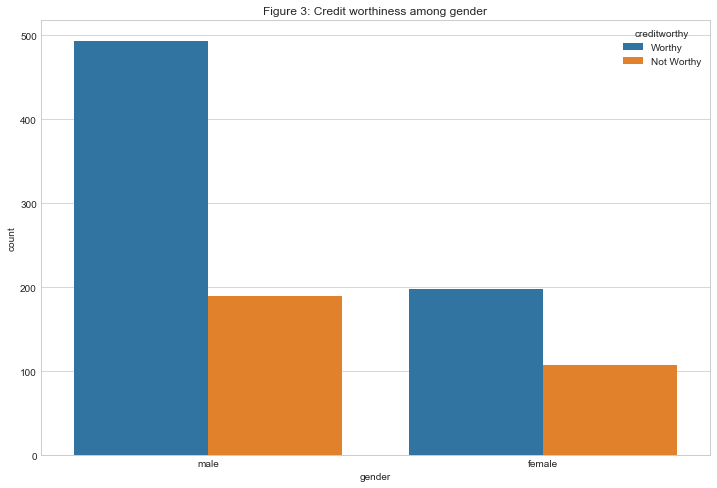

In [5]:
#Investigating the gender of applicants

#Finding the number of male and female applicants
male = data[data['gender'] == 'male']
female = data[data['gender'] == 'female']

print('There are a total of {} male applicants in the data'.format(len(male)))
print('There are a total of {} female applicants in the data'.format(len(female)))
print('')

#Proportions of male and female applicants
proportions = data['gender'].value_counts(normalize = True)
print('Proportions:')
print(proportions)
print('')

#Credit worthiness among the gender
male_worthy = male[male['creditworthy'] == 'Worthy']
male_unworthy = male[male['creditworthy'] == 'Not Worthy']

female_worthy = female[female['creditworthy'] == 'Worthy']
female_unworthy = female[female['creditworthy'] == 'Not Worthy']

print('Number of worthy male applicants: {}'.format(len(male_worthy)))
print('Number of unworthy male applicants: {}'.format(len(male_unworthy)))
print('')
print('Number of worthy female applicants: {}'.format(len(female_worthy)))
print('Number of unworthy female applicants: {}'.format(len(female_unworthy)))


#Visualizing the number of male and female applicants
plt.figure(figsize = (12, 8))
sns.countplot(x= data['gender'])
plt.title('Figure 3: Counts of Male and Female Applicants')
plt.show()
print('')

#Visualizing the number of male and female applicants found to be credit worthy or not
plt.figure(figsize = (12, 8))
sns.countplot(x = 'gender', hue = 'creditworthy', data = data)
plt.title('Figure 3: Credit worthiness among gender')
plt.show()

<h5 style = 'font-family:verdana'>Gender of Applicants</h5>
<p style = 'font-family:verdana'>The data was gathered on 988 loan applicants of which 683 are male making about 70% of the total number. The number of female applicants is 305 making up 30% of the data. The credit worthiness of applicants according to their gender shows that more male applicants were found to be credit worthy as compared to the females. This could be due the fact the there are more males in the dataset to begin with. But will that still be case when given a larger sample size where the number of males and females applicants are similar? This question could be answered using a hypothesis test.</p>

Number of worthy applicants: 691
Number of unworthy applicants: 297



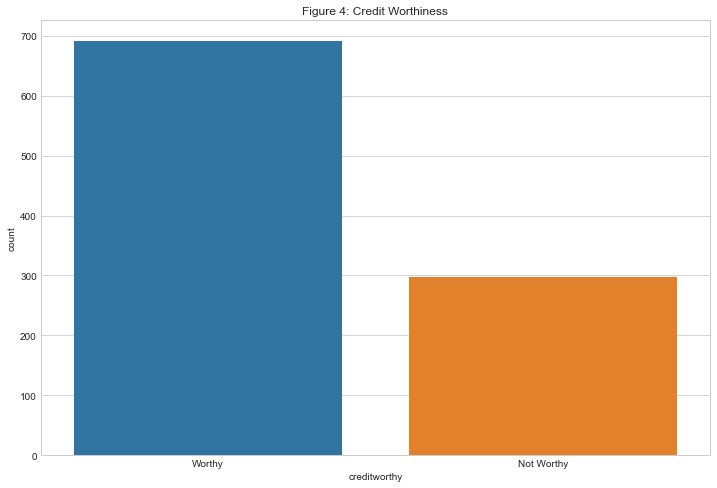

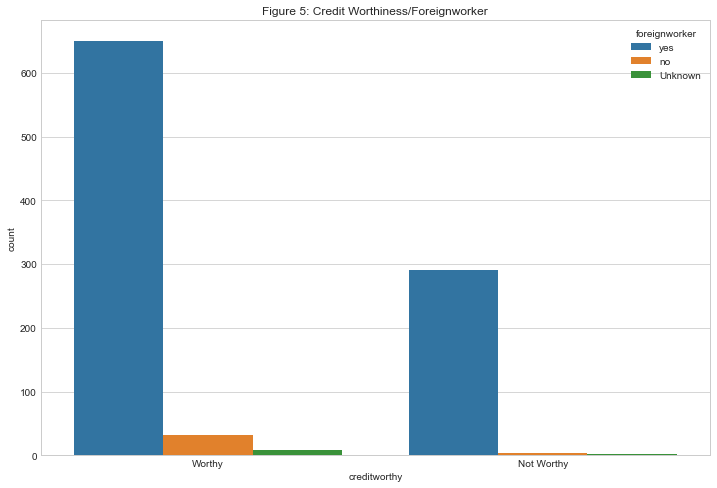


purpose       business  car (new)  car (used)  domestic appliances  education  \
creditworthy                                                                    
Not Worthy          33         87          17                    4         22   
Worthy              61        143          84                    8         28   

purpose       furniture/equipment  others  radio/television  repairs  \
creditworthy                                                           
Not Worthy                     58       5                62        8   
Worthy                        122       7               216       14   

purpose       retraining  
creditworthy              
Not Worthy             1  
Worthy                 8  


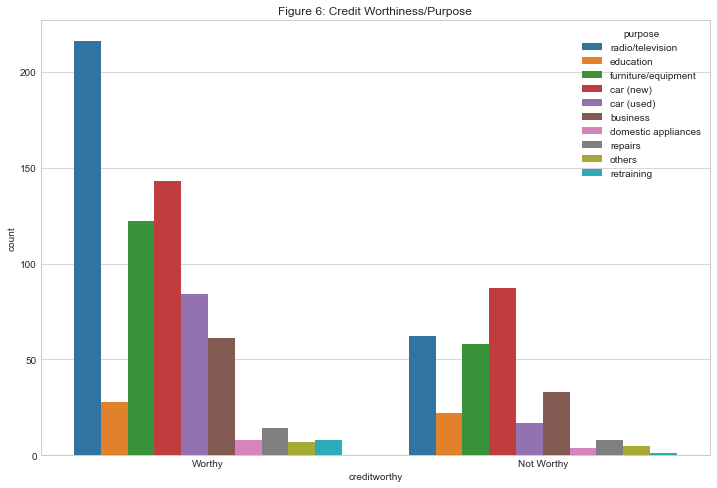

In [6]:
#Looking at the credit worthiness column

#Number of credit worthy applicants
worthy = data[data['creditworthy'] == 'Worthy']
unworthy = data[data['creditworthy'] == 'Not Worthy']

print('Number of worthy applicants: {}'.format(len(worthy)))
print('Number of unworthy applicants: {}'.format(len(unworthy)))
print('')

#Visualizing credit worthiness
plt.figure(figsize = (12, 8))
sns.countplot(x = 'creditworthy', data = data)
plt.title('Figure 4: Credit Worthiness')
plt.show()
print('')

plt.figure(figsize = (12, 8))
sns.countplot(x = 'creditworthy', hue = 'foreignworker', data = data)
plt.title('Figure 5: Credit Worthiness/Foreignworker')
plt.show()
print('')

#Contigency Table to find the purposes for which credit was given often
purpose_crosstab = pd.crosstab(data['creditworthy'], data['purpose'])
print(purpose_crosstab)

plt.figure(figsize = (12, 8))
sns.countplot(x = 'creditworthy', hue = 'purpose', data = data)
plt.title('Figure 6: Credit Worthiness/Purpose')
plt.show()

<h5 style = 'font-family:verdana'>Credit Worthiness of Applicants</h5>
<p style = 'font-family:verdana'>The 'creditworthy' column in the dataframe gives information on which applicant is credit worthy or not worthy, depending on the combination of the other features. This is the column that a machine learning model will try to predict. From the data, it is observed that 691 of the applicants were found to be credit worthy while 297 were not worthy.</p>

In [7]:
data.columns

Index(['foreignworker', 'status', 'credithistory', 'purpose', 'savings',
       'employmentsince', 'otherdebtors', 'property', 'otherinstallments',
       'housing', 'job', 'phone', 'duration', 'creditamount',
       'installmentrate', 'residencesince', 'age', 'numberofexsistingcredits',
       'numberofliablepeople', 'gender', 'creditworthy',
       'creditamout_per_month'],
      dtype='object')

In [8]:
data['status'].unique()

array(['< 0 Euro', '< 200 Euro', 'no checking account', '>= 200 Euro'],
      dtype=object)

In [11]:
jupyter nbconvert Predictive_analytics.ipynb --to pdf

SyntaxError: invalid syntax (<ipython-input-11-06b1bafe8051>, line 1)